In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft

Q1. Calculate the FFT of a signal $ F(t)=\sin 50t.$  $ \\ $
   Change the sampling frequency and sampling time and see the effect on the power spectrum. $ \\ $
   Do you see your observations in conformation with sampling theorem? You should be able to plot the abscissa of your power spectrum.

sampling : 16 |	freq res. : 0.09999999999999999 |	maxn. frequency : 1.5999999999999999


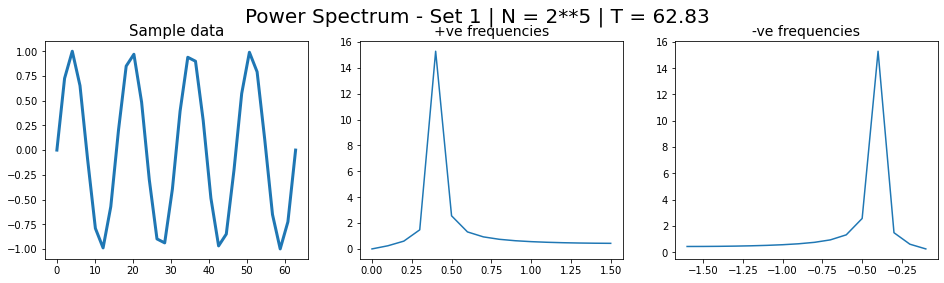

sampling : 128 |	freq res. : 0.06281407035175879 |	maxn. frequency : 8.040201005025125


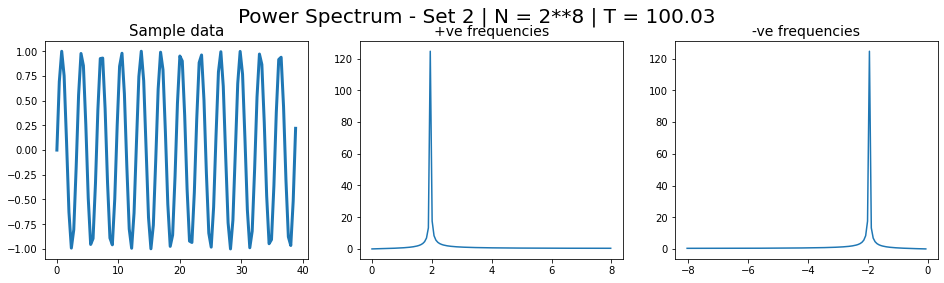

sampling : 2048 |	freq res. : 0.06249999999999999 |	maxn. frequency : 127.99999999999999


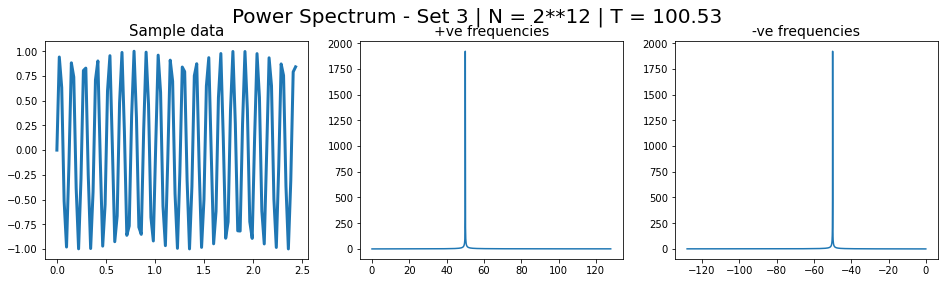

sampling : 64 |	freq res. : 1.9999999999999998 |	maxn. frequency : 127.99999999999999


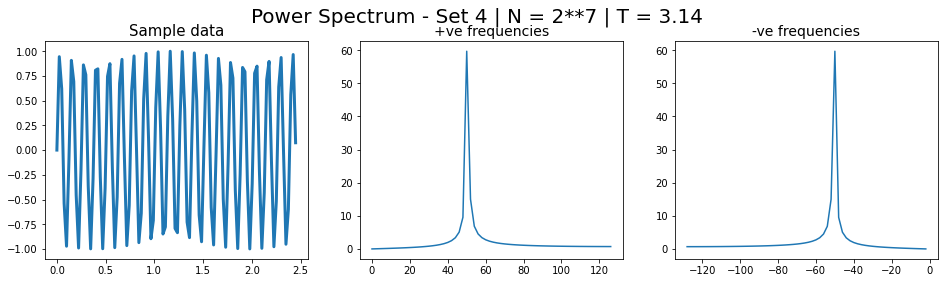

sampling : 128 |	freq res. : 0.22222222222222218 |	maxn. frequency : 28.44444444444444


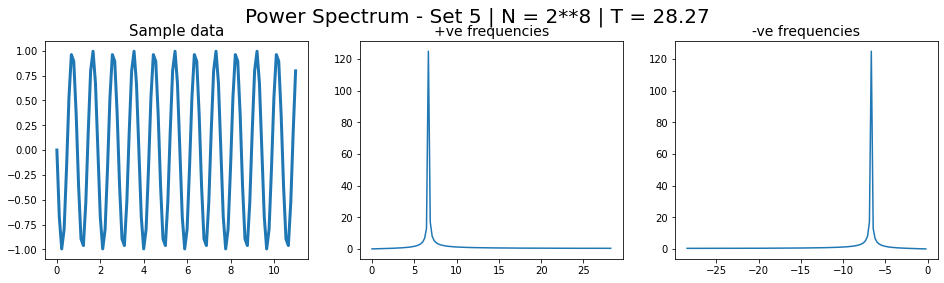

sampling : 512 |	freq res. : 0.049999999999999996 |	maxn. frequency : 25.599999999999998


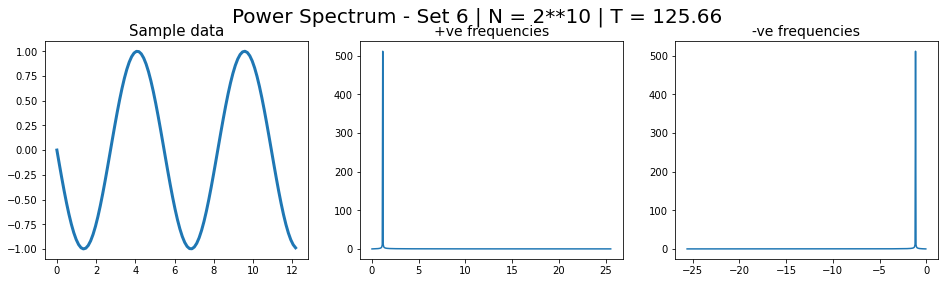

sampling : 2048 |	freq res. : 0.049999999999999996 |	maxn. frequency : 102.39999999999999


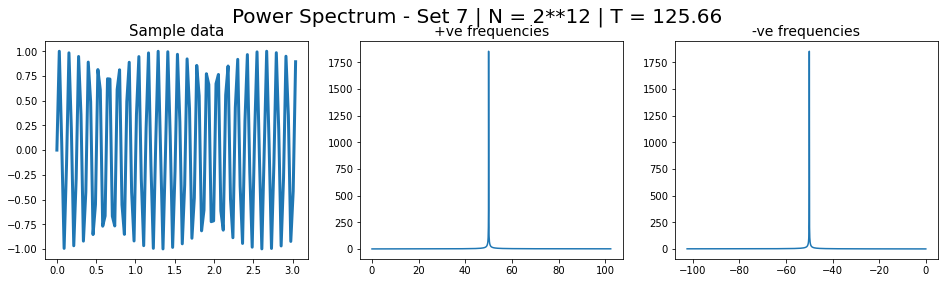

In [2]:
w=50          # signal frequency
Tp=2*np.pi/w  # signal time period
k=[5,8,12,7,8,10,12]          # intevals
t=[500,796,800,800/(2**5),900/(2**2),1000,1000]
i=[1,2,3,4,5,6,7]

for t,k,i in zip(t,k,i):
    T=t*Tp      # total time period
    N=2**k        # total no. of data points
    Nh=int(N/2)   # sampling the spectrum into equal two parts
    X,h=np.linspace(0,T,N, retstep=True)
    wo=2*np.pi/T  # frequency resolution
    wmax=wo*Nh    # max frequency for sampling
    print ('sampling :',Nh,'|\tfreq res. :', wo,'|\tmaxn. frequency :', wmax)
    Y=np.sin(w*X)
    Yp=np.abs(fft.fft(Y))
    Wp=np.arange(0,wmax,wo)  # taking the positive side
    Wn=np.arange(-wmax,0,wo) # taking the negative side
    fig,(ax,ax1,ax2)=plt.subplots(1,3,figsize=(16,4))
    plt.suptitle('Power Spectrum - Set %i | N = 2**%i | T = %0.2f'%(i,k,T),y=1.,fontsize=20)
    ax.plot(X[:100],Y[:100],linewidth=3)
    ax.set_title('Sample data',fontsize=15)
    ax1.plot(Wp,Yp[:Nh])
    ax1.set_title('+ve frequencies',fontsize=14)
    ax2.plot(Wn,Yp[Nh:])
    ax2.set_title('-ve frequencies',fontsize=14)
    plt.savefig("fft.png")
    plt.show()

### Comments :
              1. The number of data points should always be greater than or equal to the length of 𝜔/2𝜋 
              2.Choosing very short data point to compute can lead to poor results, 
                particularly if we have short epochs and only if we are interested in analyzing lower frequencies.
              3.Large data point can result in finer resolution of power spectrum, but can lead to noisy power spectrum. 
                One needs to strike a balance here, depending on the frequencies of interest.

Q2. Calculate the FFT of a signal $F(t)=\sin t + \sin \pi t $. Plot the signal and its power spectrum. Write
your comments.

sampling : 64 |	freq res. : 0.001388888888888889 |	maxn. frequency : 0.08888888888888889


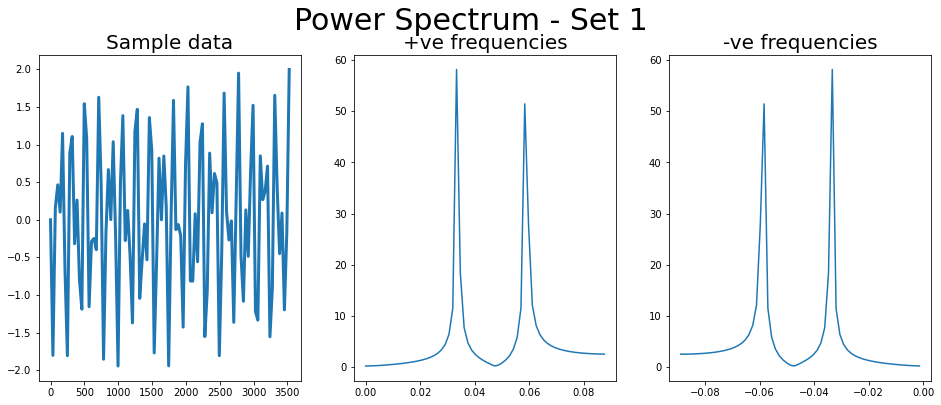

sampling : 128 |	freq res. : 0.0013333333333333333 |	maxn. frequency : 0.17066666666666666


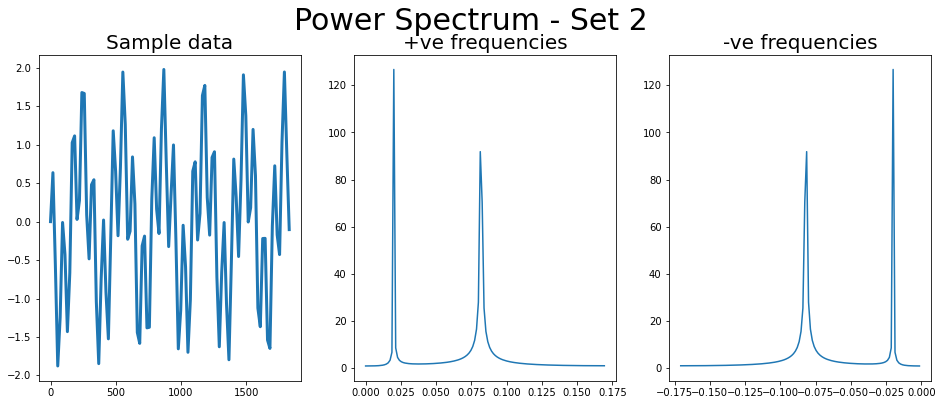

sampling : 128 |	freq res. : 0.0012903225806451613 |	maxn. frequency : 0.16516129032258065


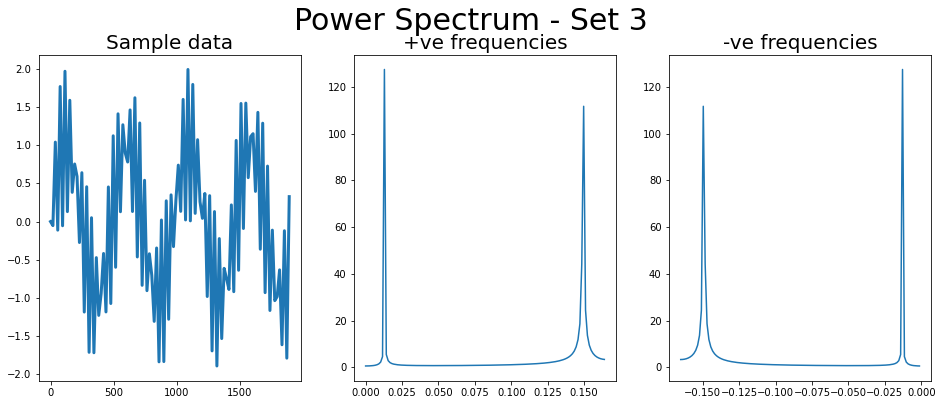

sampling : 256 |	freq res. : 0.00125 |	maxn. frequency : 0.32


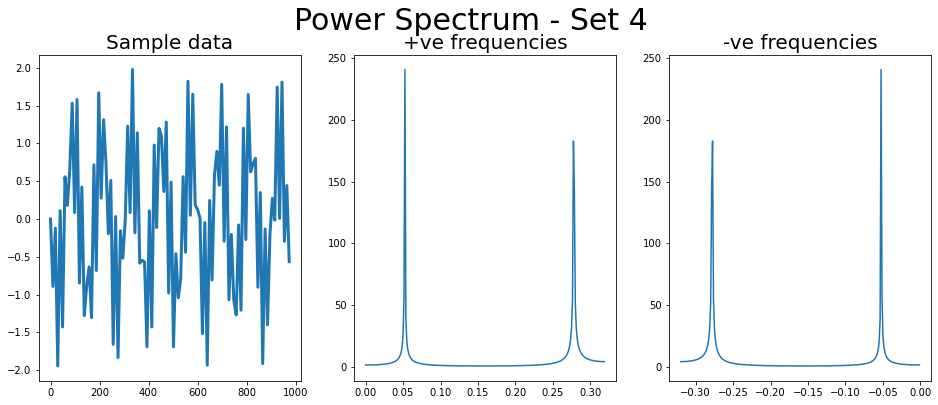

sampling : 256 |	freq res. : 0.001 |	maxn. frequency : 0.256


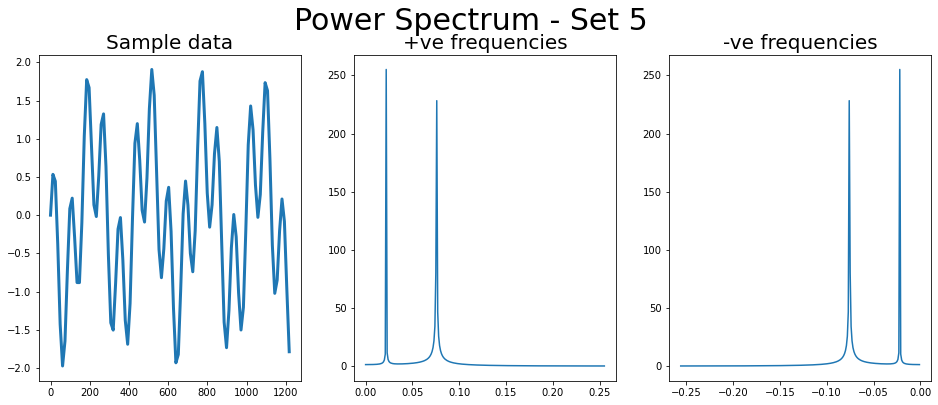

sampling : 512 |	freq res. : 0.001 |	maxn. frequency : 0.512


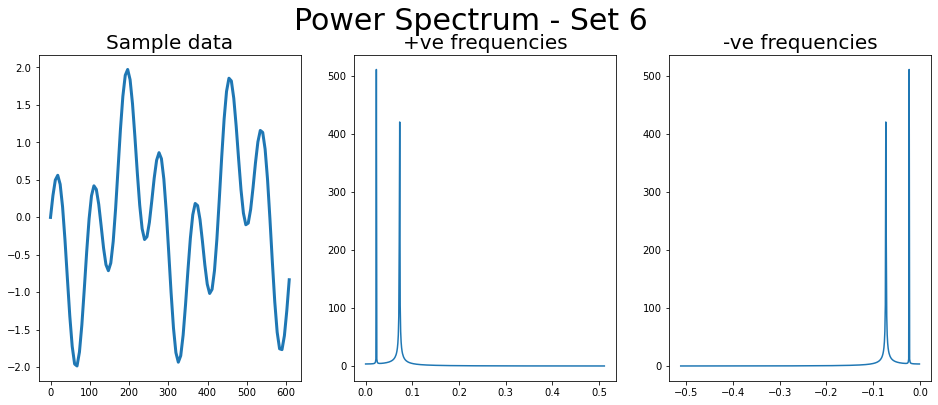

sampling : 1024 |	freq res. : 0.0007692307692307692 |	maxn. frequency : 0.7876923076923077


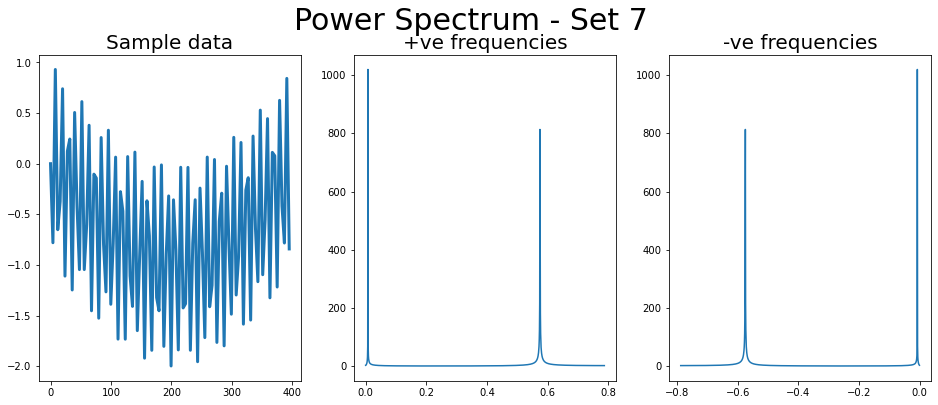

In [3]:
k=[7,8,8,9,9,10,11]          # intevals
t=[720,750,775,800,1000,1000,1300]
i=[1,2,3,4,5,6,7]

for t,k,i in zip(t,k,i):
    w=1          # signal frequency
    Tp=2*np.pi/w  # signal time period
    T=t*Tp      # total time period
    N=2**k        # total no. of data points
    Nh=int(N/2)   # sampling the spectrum into equal two parts
    X,h=np.linspace(0,T,N, retstep=True)
    wo=2*np.pi/T  # frequency resolution
    wmax=wo*Nh    # max frequency 
    print ('sampling :',Nh,'|\tfreq res. :', wo,'|\tmaxn. frequency :', wmax)
    Y=np.sin(w*X) + np.sin(np.pi*X)
    YP=np.abs(fft.fft(Y))
    WP=np.arange(0,wmax,wo)  # taking the positive side
    WN=np.arange(-wmax,0,wo) # taking the negative side
    fig,(ax,ax1,ax2)=plt.subplots(1,3,figsize=(16,6))
    plt.suptitle('Power Spectrum - Set %i'%i,y=0.99,fontsize=30)
    ax.plot(X[:100],Y[:100],linewidth=3)
    ax.set_title('Sample data',fontsize=20)
    ax1.plot(WP,YP[:Nh])
    ax1.set_title('+ve frequencies',fontsize=20)
    ax2.plot(WN,YP[Nh:])
    ax2.set_title('-ve frequencies',fontsize=20)
    plt.show()

### Comment:
                Highly overlapping  data points does not guarantee smoother power spectrum estimates 
                due to high correlation between the data points